In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import seaborn as sns

In [9]:
df = pd.read_csv("bom.movie_gross.csv.gz")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
df.shape

(3387, 5)

In [4]:
value = df.isnull().values.any()
value

True

In [5]:
result = df.isnull().sum()
result

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

<Axes: >

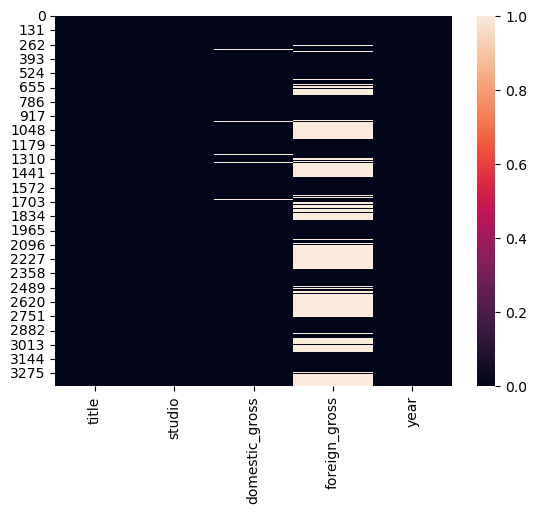

In [6]:
sns.heatmap(df.isnull())

In [7]:
per_missing = df.isnull().sum()*100 / len(df)
per_missing

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [8]:
df2=df.fillna(0)
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [9]:
df2.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [10]:
#Checking for dups
dup_df2=df2.duplicated().any()
dup_df2

False

In [11]:
means= df["domestic_gross"].mean()
means

28745845.06698422

In [22]:
stats=df2.describe()
stats

,domestic_gross,year
count,3.387000e+03,3387.000000
mean,2.850821e+07,2013.958075
std,6.675575e+07,2.478141
min,0.000000e+00,2010.000000
25%,1.115000e+05,2012.000000
50%,1.300000e+06,2014.000000
75%,2.750000e+07,2016.000000
max,9.367000e+08,2018.000000


In [29]:
#top 20 movies with above av. domestic gross
best_perf =df.loc[df['domestic_gross']>47019840] ['title']
best_perf.head(20)

0                                           Toy Story 3
1                            Alice in Wonderland (2010)
2           Harry Potter and the Deathly Hallows Part 1
3                                             Inception
4                                   Shrek Forever After
5                            The Twilight Saga: Eclipse
6                                            Iron Man 2
7                                               Tangled
8                                         Despicable Me
9                              How to Train Your Dragon
10                           Clash of the Titans (2010)
11    The Chronicles of Narnia: The Voyage of the Da...
12                                    The King's Speech
13                                          Tron Legacy
14                                       The Karate Kid
15                  Prince of Persia: The Sands of Time
16                                           Black Swan
17                                             M

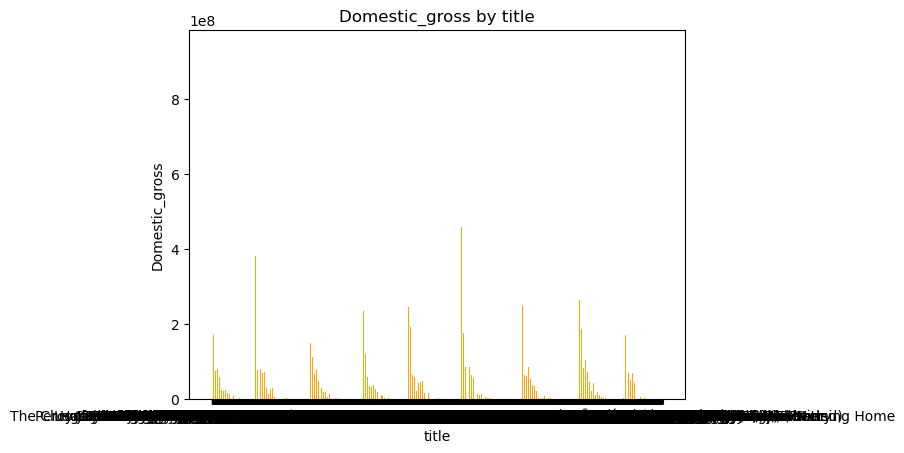

In [38]:
year=best_perf[0]
title=best_perf[1]

plt.bar(year, title)
plt.title('Number of movies produced yearly')
plt.xlabel('Year')
plt.ylabel('Movies')
plt.show

plt.bar(df['title'],df['domestic_gross'], width=0.5, color="orange")
plt.title('Domestic_gross by title')
plt.xlabel('title')
plt.ylabel('Domestic_gross')
plt.show()

In [13]:
#Year with the highest dom. gross
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [65]:
#Year with the highest av dom. gross
av = df.groupby('year')['domestic_gross'].mean().sort_values()
av.head(10)

year
2015    2.461338e+07
2011    2.535052e+07
2016    2.598996e+07
2014    2.643923e+07
2012    2.767584e+07
2013    3.128212e+07
2010    3.144559e+07
2017    3.416646e+07
2018    3.601042e+07
Name: domestic_gross, dtype: float64

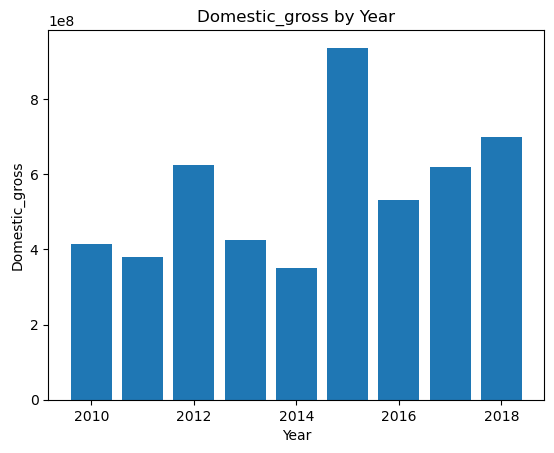

In [68]:
plt.bar(df['year'], df['domestic_gross'])
plt.title('Domestic_gross by Year')
plt.xlabel('Year')
plt.ylabel('Domestic_gross')
plt.show()

In [41]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [10]:
#display top 20 movies with the highest dom.gross
studio_gross = df.nlargest(20,'domestic_gross')
studio_gross

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


<function matplotlib.pyplot.show(close=None, block=None)>

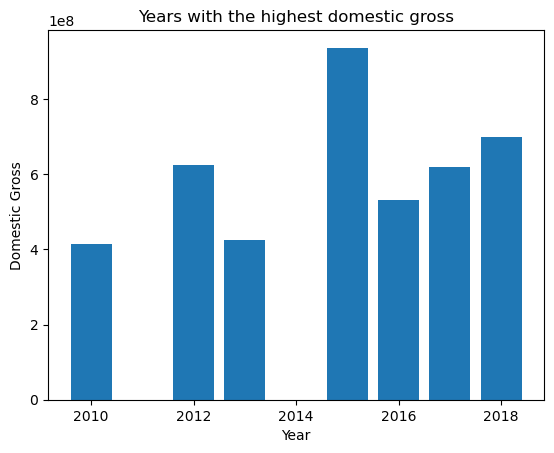

In [15]:
year=studio_gross['year']
domestic_gross=studio_gross['domestic_gross']

plt.bar(year, domestic_gross)
plt.title('Years with the highest domestic gross')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

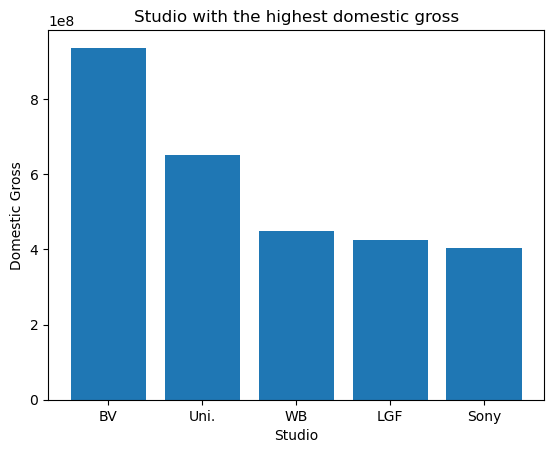

In [56]:
#Studio with the highest domestic gross
studio=studio_gross['studio']
domestic_gross=studio_gross['domestic_gross']

plt.bar(studio, domestic_gross)
plt.title('Studio with the highest domestic gross')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.show

In [57]:
#plt.bar(df['domestic_gross'], df['studio'], width=0.5, color="orange")
#plt.title('Studio making the highest dom gross')
#plt.xlabel('domestic_gross')
#plt.ylabel('top10_movies.index,df=top10_movies')
#plt.show()

In [59]:
#No of movies produced per year
df.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [24]:
movies_yearly=df['year'].value_counts()
movies_yearly

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

In [29]:
year= ['2015', '2016', '2012', '2011', '2014', '2013', '2010', '2017', '2018']
movies=['450', '436', '400', '399', '395', '350', '328', '321', '308']
new = pd.DataFrame(list(zip(year, movies)))
new

,0,1
0,2015,450
1,2016,436
2,2012,400
3,2011,399
4,2014,395
5,2013,350
6,2010,328
7,2017,321
8,2018,308


<function matplotlib.pyplot.show(close=None, block=None)>

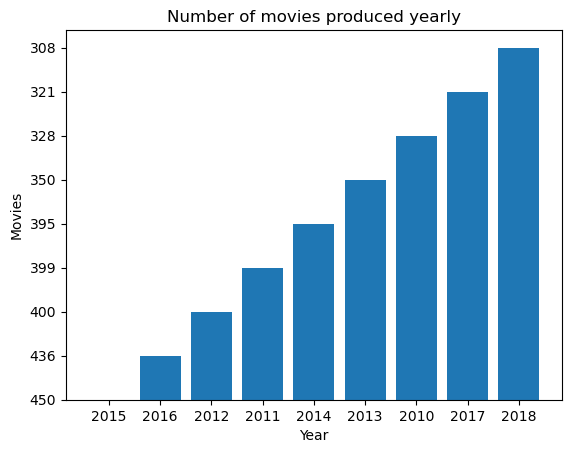

In [32]:
year=new[0]
title=new[1]

plt.bar(year, title)
plt.title('Number of movies produced yearly')
plt.xlabel('Year')
plt.ylabel('Movies')
plt.show

In [ ]:
#Most popular studio(Highest movie no.of movies produced)

In [64]:
df[df['title'].max()==df['title']]['studio']

2785    Par.
Name: studio, dtype: object

In [ ]:
#Display top 20 movies with best domestic gross and their studio

In [65]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [67]:
top20_movies=df.nlargest(20,'domestic_gross')[['domestic_gross','studio','title' ]]\
.set_index('title')

In [68]:
top20_movies

,domestic_gross,studio
title,,
Star Wars: The Force Awakens,936700000.0,BV
Black Panther,700100000.0,BV
Avengers: Infinity War,678800000.0,BV
Jurassic World,652300000.0,Uni.
Marvel's The Avengers,623400000.0,BV
Star Wars: The Last Jedi,620200000.0,BV
Incredibles 2,608600000.0,BV
Rogue One: A Star Wars Story,532200000.0,BV
Beauty and the Beast (2017),504000000.0,BV


In [20]:

 #Unique values from studio column
one_d=df['studio']
one_d

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object

In [9]:
unistudio = df['studio'].unique()
unistudio

        

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

In [23]:
df['studio'].nunique()

257

In [25]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [29]:
df1 =df.fillna(0)
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [46]:
df['domestic_gross'].tolist()

[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 104400000.0,
 135500000.0,
 172100000.0,
 176600000.0,
 90800000.0,
 107000000.0,
 148400000.0,
 105300000.0,
 131800000.0,
 148400000.0,
 60100000.0,
 128000000.0,
 118300000.0,
 95300000.0,
 67600000.0,
 103100000.0,
 162000000.0,
 76400000.0,
 171200000.0,
 42800000.0,
 88800000.0,
 97000000.0,
 110500000.0,
 63200000.0,
 100500000.0,
 80600000.0,
 100200000.0,
 90400000.0,
 84800000.0,
 77200000.0,
 117200000.0,
 119200000.0,
 81600000.0,
 42400000.0,
 94800000.0,
 92200000.0,
 98700000.0,
 55700000.0,
 62000000.0,
 67099999.0,
 45700000.0,
 52500000.0,
 93600000.0,
 52000000.0,
 63100000.0,
 80000000.0,
 43600000.0,
 60000000.0,
 53400000.0,
 32700000.0,
 10100000.0,
 32400000.0,
 63000.0,
 47100000.0,
 48100000.0,
 35100000.0,
 29000000.0,
 61000000.0,
 39400000.0,
 63000000.0,
 73000000.0,
 33600000.0,
 25000000.0,
 19400000.0

In [47]:
df['domestic_gross'].sum()

96557293580.0

In [52]:
df.groupby('studio')[['domestic_gross']].agg('sum')

,domestic_gross
studio,
3D,6100000.0
A23,164200.0
A24,324194200.0
ADC,248200.0
AF,2142900.0
...,...
XL,458000.0
YFG,1100000.0
Yash,31631400.0


In [30]:
df1.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [8]:
#No of movies produced by each studio.
studio_count=df['studio'].value_counts()
studio_count.head(20)

studio
IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: count, dtype: int64

In [72]:
#prod= ['IFC','Uni.', 'WB', 'Fox  ', 'Magn.', 'SPC  ', 'Sony ', 'BV ', 'LGF ', 'Par.', 'Eros ', 'Wein.']
#mov = ['166', '147', '140', '136','136','123', '110', '106', '103', '101', '89', '77', '74', '68','67', '66', '62', '60', '58', '56']
prod=['Wein.', 'Eros', 'Par.', 'LGF', 'BV', 'Sony', 'SPC', 'Magn.', 'Fox', 'WB', 'Uni.', 'IFC']
mov=['77', '89', '101', '103', '106', '110', '123', '136', '136', '140', '147','166']

fig=pd.DataFrame(list(zip(prod, mov)))
fig

,0,1
0,Wein.,77
1,Eros,89
2,Par.,101
3,LGF,103
4,BV,106
5,Sony,110
6,SPC,123
7,Magn.,136
8,Fox,136
9,WB,140


<function matplotlib.pyplot.show(close=None, block=None)>

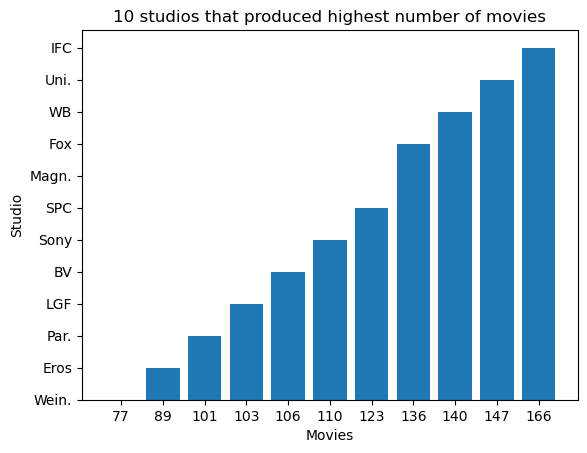

In [73]:

studio=fig[0]
movies=fig[1]

plt.bar(movies, studio)
plt.title('10 studios that produced highest number of movies')
plt.xlabel('Movies')
plt.ylabel('Studio')
plt.show

In [34]:
#Total gross each studio made from the movies
studio_dom_gross = df.groupby(['studio', 'domestic_gross']).sum()
studio_dom_gross



title  \
studio domestic_gross                                               
3D     6100000.0       Sea Rex 3D: Journey to a Prehistoric World   
A23    13200.0                                      Red Obsession   
       151000.0                       Revenge of the Electric Car   
A24    5700.0                                 Trespass Against Us   
       6100.0                                       Barely Lethal   
...                                                           ...   
Zeit.  435000.0                                            Vision   
       675000.0                                  Mid-August Lunch   
       717000.0                                     Hannah Arendt   
       820000.0                  BOMBSHELL: The Hedy Lamarr Story   
       1500000.0                         Bill Cunningham New York   

                      foreign_gross  year  
studio domestic_gross                      
3D     6100000.0            9900000  2010  
A23    13200.0                    0  2013  
       151000.0                   0  2011  
A24    5700.0                     0  2017  
       6100.0                     0  2015  
...                             ...   ...  
Zeit.  435000.0             4600000  2010  
       675000.0             8700000  2010  
       717000.0                   0  2013  
       820000.0                   0  2017  
       1500000.0                  0  2011  

[3173 rows x 3 columns]

In [ ]:
# movies produced by each studio per year

In [42]:
perform = df.sort_values(by=['domestic_gross'], ascending=False)
perform



,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [39]:
#New_df_sort=New_df.sort_values( ['popularity','vote_average', 'vote_count'], ascending=False)
#New_df_sort.head(20)

In [ ]:
#checking the number of movies produced by a studio
#New_df_sort.original_language.value_counts()